# A quick insight at world population

## Collecting population data

In the below we retrieve population data from the
[World Bank](http://www.worldbank.org/)
using the [wbdata](https://github.com/OliverSherouse/wbdata) python package

In [1]:
import pandas as pd
import wbdata as wb

pd.options.display.max_rows = 6
pd.options.display.max_columns = 20

Corresponding indicator is found using search method - or, directly,
the World Bank site.

In [2]:
wb.search_indicators('Population, total')  # SP.POP.TOTL
# wb.search_indicators('area')
# => https://data.worldbank.org/indicator is easier to use

SP.POP.TOTL	Population, total


Now we download the population data

In [3]:
indicators = {'SP.POP.TOTL': 'Population, total',
              'AG.SRF.TOTL.K2': 'Surface area (sq. km)',
              'AG.LND.TOTL.K2': 'Land area (sq. km)',
              'AG.LND.ARBL.ZS': 'Arable land (% of land area)'}
data = wb.get_dataframe(indicators, convert_date=True).sort_index()
data

Population, total  Surface area (sq. km)  \
country     date                                                   
Afghanistan 1960-01-01          8996351.0                    NaN   
            1961-01-01          9166764.0               652860.0   
            1962-01-01          9345868.0               652860.0   
...                                   ...                    ...   
Zimbabwe    2015-01-01         15777451.0               390760.0   
            2016-01-01         16150362.0               390760.0   
            2017-01-01         16529904.0               390760.0   

                        Land area (sq. km)  Arable land (% of land area)  
country     date                                                          
Afghanistan 1960-01-01                 NaN                           NaN  
            1961-01-01            652860.0                     11.717673  
            1962-01-01            652860.0                     11.794259  
...                                    ...                           ...  
Zimbabwe    2015-01-01            386850.0                     10.339925  
            2016-01-01            386850.0                           NaN  
            2017-01-01            386850.0                           NaN  

[15312 rows x 4 columns]

World is one of the countries

In [4]:
data.loc['World']

Population, total  Surface area (sq. km)  Land area (sq. km)  \
date                                                                       
1960-01-01       3.032160e+09                    NaN                 NaN   
1961-01-01       3.073369e+09            134043190.4         129721455.4   
1962-01-01       3.126510e+09            134043190.4         129721435.4   
...                       ...                    ...                 ...   
2015-01-01       7.357559e+09            134325130.2         129732901.8   
2016-01-01       7.444157e+09            134325130.2         129733172.7   
2017-01-01       7.530360e+09            134325130.2         129733172.7   

            Arable land (% of land area)  
date                                      
1960-01-01                           NaN  
1961-01-01                      9.693086  
1962-01-01                      9.726105  
...                                  ...  
2015-01-01                     10.991288  
2016-01-01                           NaN  
2017-01-01                           NaN  

[58 rows x 4 columns]

Can we classify over continents?

In [5]:
data.loc[(slice(None), '2017-01-01'), :]['Population, total'].dropna(
).sort_values().tail(60).index.get_level_values('country')

Index(['Iran, Islamic Rep.', 'Congo, Dem. Rep.', 'Germany', 'Vietnam',
       'Egypt, Arab Rep.', 'Central Europe and the Baltics', 'Philippines',
       'Ethiopia', 'Japan', 'Mexico', 'Russian Federation', 'Bangladesh',
       'Nigeria', 'Pakistan', 'Brazil', 'Indonesia', 'United States',
       'Euro area', 'North America',
       'Middle East & North Africa (IDA & IBRD countries)',
       'Middle East & North Africa (excluding high income)', 'Arab World',
       'Europe & Central Asia (excluding high income)',
       'Middle East & North Africa',
       'Europe & Central Asia (IDA & IBRD countries)',
       'Fragile and conflict affected situations', 'European Union',
       'IDA blend', 'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Latin America & Caribbean', 'Low income',
       'Heavily indebted poor countries (HIPC)', 'Pre-demographic dividend',
       'Europe & Central Asia', 'Least developed countrie

Extract zones manually (in order of increasing population)

In [6]:
zones = ['North America', 'Middle East & North Africa',
         'Latin America & Caribbean', 'Europe & Central Asia',
         'Sub-Saharan Africa', 'South Asia',
         'East Asia & Pacific'][::-1]

And extract population information (and check total is right)

In [21]:
population = data.loc[zones]['Population, total'].swaplevel().unstack()
population = population[zones]
assert all(data.loc['World']['Population, total'] == population.sum(axis=1))

## Stacked area plot with matplotlib

In [22]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

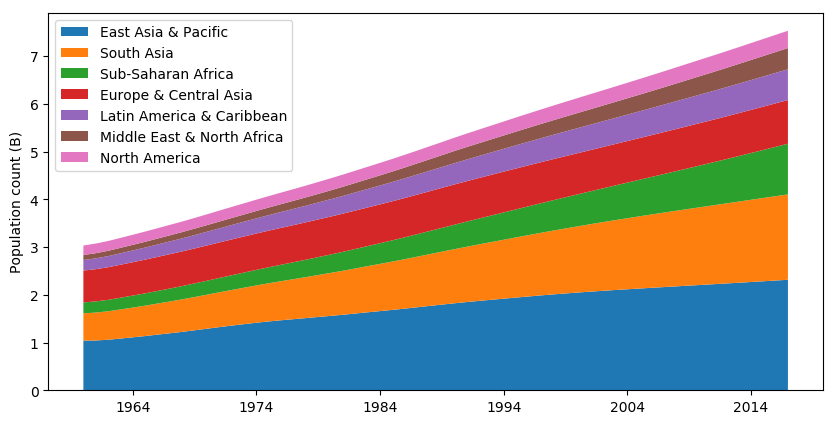

In [23]:
plt.clf()
plt.figure(figsize=(10, 5), dpi=100)
plt.stackplot(population.index, population.values.T / 1e9)
plt.legend(population.columns, loc='upper left')
plt.ylabel('Population count (B)')
plt.show()

## Stacked bar plot with plotly

Stacked area plots (with cumulated values computed depending on
selected legends) are
[on their way](https://github.com/plotly/plotly.js/pull/2960) at Plotly. For
now we just do a stacked bar plot.

In [10]:
import plotly.offline as offline
import plotly.graph_objs as go

offline.init_notebook_mode()

In [11]:
bars = [go.Bar(x=population.index, y=population[zone], name=zone)
        for zone in zones]
fig = go.Figure(data=bars,
                layout=go.Layout(title='World population',
                                 barmode='stack'))
offline.iplot(fig)